**AZ Watch** is a popular video streaming platform specialized in educational content, where creators publish online video tutorials and lessons about any topic, from speaking a new language to cooking to learning to play a musical instrument.

Their next goal is to leverage AI-driven solutions to analyze and make predictions about their subscribers and improve their marketing strategy around attracting new subscribers and retaining current ones. This project uses machine learning to predict subscribers likely to churn and find customer segments. This may help AZ Watch find interesting usage patterns to build subscriber personas in future marketing plans!

The `data/AZWatch_subscribers.csv` **dataset** contains information about subscribers and their status over the last year:

|Column name|Description|
|-----------|-----------|
|`subscriber_id`|The unique identifier of each subscriber user|
|`age_group`|The subscriber's age group|
|`engagement_time`|Average time (in minutes) spent by the subscriber per session|
|`engagement_frequency`|Average weekly number of times the subscriber logged in the platform (sessions) over a year period|
|`subscription_status`|Whether the user remained subscribed to the platform by the end of the year period (subscribed), or unsubscribed and terminated her/his services (churned)|

Carefully observe and analyze the features in the dataset, asking yourself if there are any **categorical attributes** requiring pre-processing?

The subscribers dataset from the `data/AZWatch_subscribers.csv` file is already being loaded and split into training and test sets for you:

&nbsp;

&nbsp;

***
Help AZ Watch improve their marketing strategies by answering the following questions about their subscribers.

What is the predicted subscriber churn for AZ Watch?

Apply the necessary processing steps to prepare the data for modeling.
Train three standard classification models and save these as model1, model2, and model3.
Aim to acheive a minimum accuracy of 90% for at least one of the models. Save your best accuracy score as score.
AZ Watch wants to establish more personalized and targeted campaigns to reduce subscriber churn. What subscriber segments can be identified in the data to make their campaigns more targeted?

Apply a standard clustering method to the numerical features X. Analyze the average values by cluster_id for these numerical features and store them in analysis, rounding values to the nearest whole number.

In [19]:
# Import the necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# Specify the file path of your CSV file
file_path = "data/AZWatch_subscribers.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Separate predictor variables from class label
X = df.drop(['subscriber_id','subscription_status'], axis=1)
y = df.subscription_status

# Split intro training and test sets (20% test)
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=.2, random_state=42)

0.925
0.875
0.88


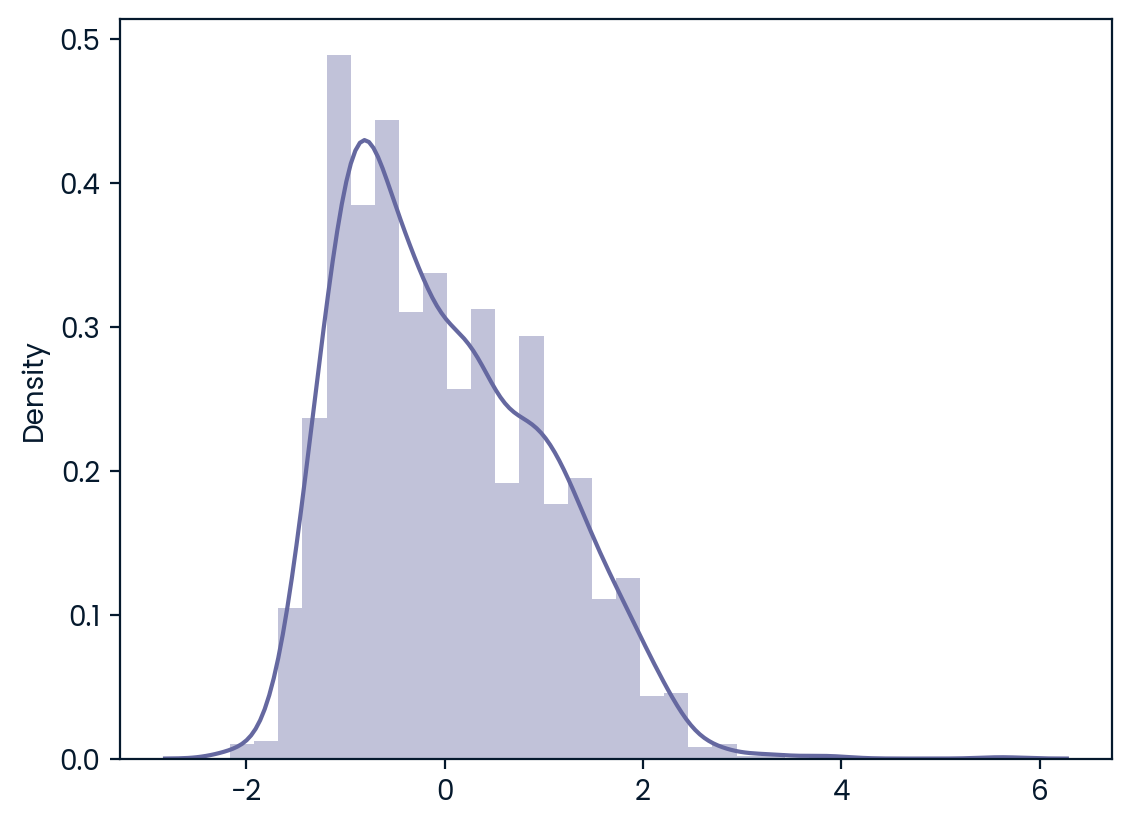

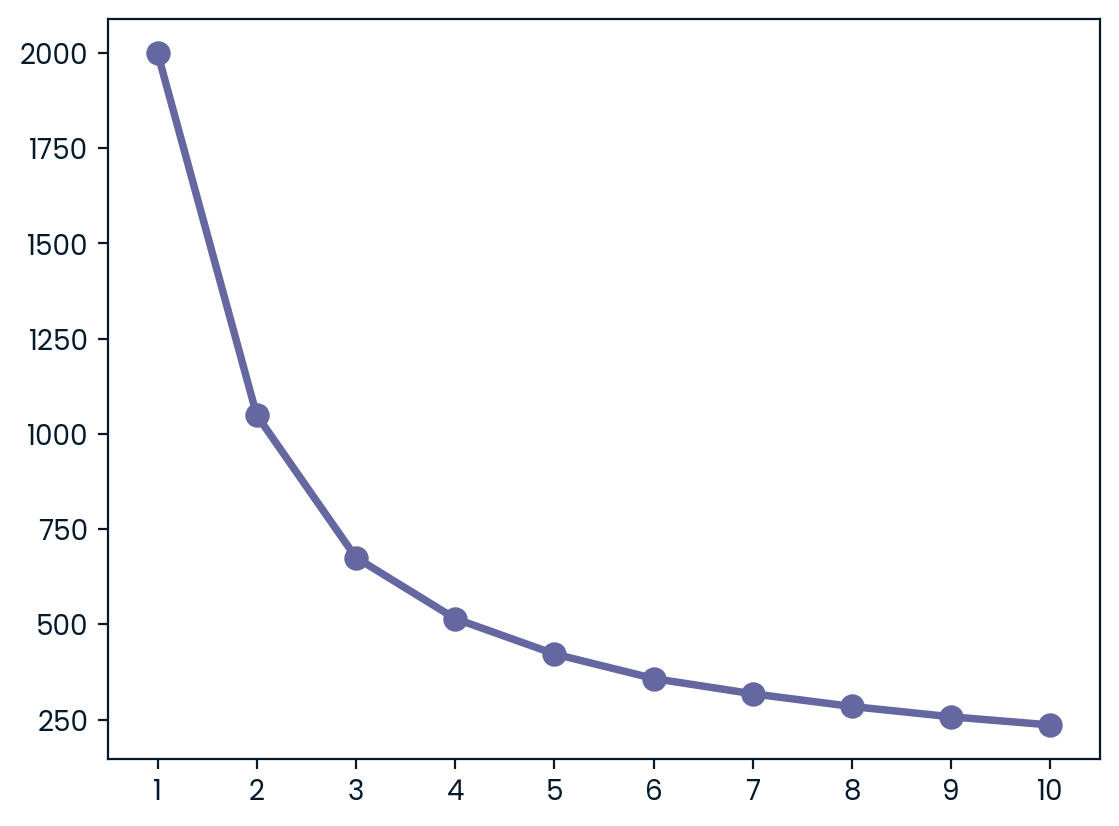

In [20]:
# Start your code here! Use as many cells as you like!
pd.set_option("display.max_rows", 0)
# print(pd.unique(df.age_group))

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

log_reg = LogisticRegression()
model1 = log_reg.fit(X_train, y_train)
dtc = DecisionTreeClassifier()
model2 = dtc.fit(X_train, y_train)
rfc = RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)

print(model1.score(X_test, y_test))
print(model2.score(X_test, y_test))
print(model3.score(X_test, y_test))
score = model1.score(X_test, y_test)

segmentation = X.drop("age_group", axis=1)
scaler = StandardScaler()
scaler.fit(segmentation)
normalised = scaler.transform(segmentation)
sns.distplot(normalised)
plt.show()

sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(normalised)
    sse[k] = kmeans.inertia_
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

kmeans = KMeans(n_clusters=3, random_state=1).fit(normalised)
segmentation["cluster_id"] = kmeans.labels_

analysis = segmentation.groupby("cluster_id").mean().round()